In [1]:
# Importing the Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import confusion_matrix

import tensorflow as tf 
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,GlobalMaxPooling2D,Dense,Flatten,BatchNormalization,Dropout
from tensorflow.keras.models import Model

In [2]:
# Importing the dataset
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()


In [3]:
# Printing the shape
print(f'x train shape:{x_train.shape}')
print(f'x test shape:{x_test.shape}')
print(f'y train shape:{y_train.shape}')
print(f'y test shape:{x_test.shape}')

x train shape:(60000, 28, 28)
x test shape:(10000, 28, 28)
y train shape:(60000,)
y test shape:(10000, 28, 28)


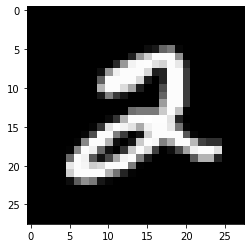

In [4]:
# Plotting a numeral
plt.imshow(x_train[5],cmap='gray')
plt.show()

In [5]:
# Reducing the dimension from 0 to 255 to 0 to 1 and adding a dimension 
x_train=x_train/255.0
x_test=x_test/255.0
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)
print(f'x train shape:{x_train.shape}')
print(f'x test shape:{x_test.shape}')

x train shape:(60000, 28, 28, 1)
x test shape:(10000, 28, 28, 1)


In [6]:
# Number of classes
K=len(set(y_train))
print(f'No of Classes: {K}')

No of Classes: 10


In [7]:
# Building the model
i=Input(shape=(x_train[0].shape))
x=Conv2D(64,2,(3,3),activation='relu')(i)
x=Conv2D(128,2,(3,3),activation='relu')(x)
x=Conv2D(256,2,(3,3),activation='relu')(x)
x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(512,activation='relu')(x)
x=Dense(K,activation='softmax')(x)

model=Model(i,x)

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 9, 9, 64)          320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 3, 128)         32896     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 256)         131328    
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 512)              

In [8]:
# Compiling the model and fitting the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20)


Epoch 1/20
1875/1875 [==============================] - 13s 7ms/step - loss: 1.1874 - accuracy: 0.5799 - val_loss: 1.0069 - val_accuracy: 0.6376
Epoch 2/20
1875/1875 [==============================] - 12s 6ms/step - loss: 1.0247 - accuracy: 0.6397 - val_loss: 0.9324 - val_accuracy: 0.6676
Epoch 3/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.9845 - accuracy: 0.6517 - val_loss: 0.9221 - val_accuracy: 0.6704
Epoch 4/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.9601 - accuracy: 0.6629 - val_loss: 0.9122 - val_accuracy: 0.6754
Epoch 5/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.9434 - accuracy: 0.6681 - val_loss: 0.8932 - val_accuracy: 0.6798
Epoch 6/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.9275 - accuracy: 0.6711 - val_loss: 0.9042 - val_accuracy: 0.6781
Epoch 7/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.9125 - accuracy: 0.6776 - val_loss: 0.8939 - val_ac

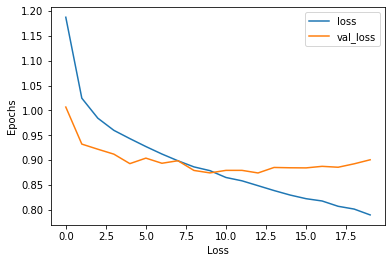

In [9]:
# Plotting the losses and the accuracy
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend()
plt.show()

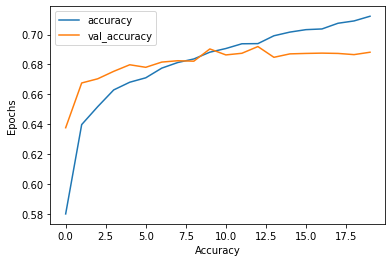

In [10]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Epochs')
plt.legend()
plt.show()

In [11]:
# Predicting the dataset
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)

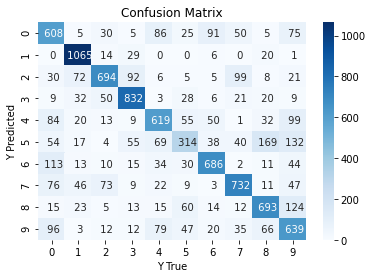

In [12]:
# Calculating Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
ax=sns.heatmap(cm,annot=True,fmt=' ',cmap='Blues')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Y True')
ax.set_ylabel('Y Predicted');

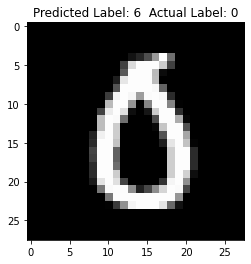

In [13]:
# Checking some where the model identified wrong
missclassified_idx=np.where(y_pred!=y_test)[0]
i=np.random.choice(missclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title('Predicted Label: %s  Actual Label: %s' %(y_pred[i],y_test[i]))
plt.show()